In [1]:
%run function_and_library.ipynb

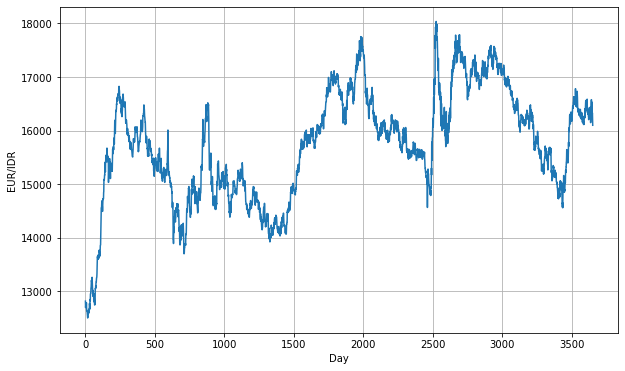

In [2]:
# Initialize lists
time_step = []
sunspots = []

# Open CSV file
with open('./currency_data_10_years.csv') as csvfile:
  
    # Initialize reader
    reader = csv.reader(csvfile, delimiter=',')

    # Skip the first line
    next(reader)

    # Append row and sunspot number to lists
    for i,row in enumerate(reader):
        time_step.append(int(i))
        sunspots.append(float(row[1]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(sunspots)

# Preview the data
plot_series(time[:365], series[:365], xlabel='Day', ylabel='EUR/IDR')

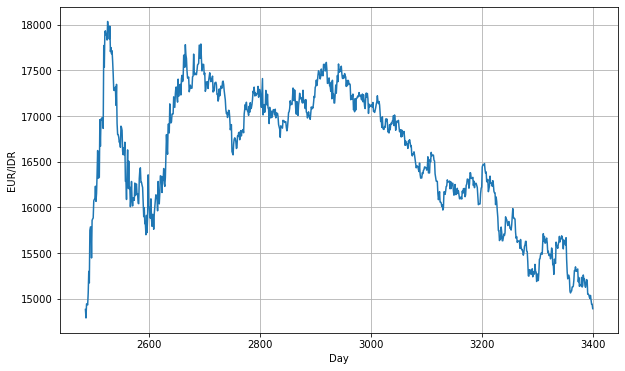

In [34]:
plot_series(time[2485:3400], series[2485:3400], xlabel='Day', ylabel='EUR/IDR')

In [3]:
split_time = 3000

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

In [10]:
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model.summary()

init_weights = model.get_weights()

model.set_weights(init_weights)

# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 10))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss='mae', optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 30, 64)            256       
                                                                 
 lstm_2 (LSTM)               (None, 30, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 30)                1950      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
 lambda_1 (Lambda)           (None, 1)                

KeyboardInterrupt: 

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-12, 1e-10, 0, 10000])

In [14]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

init_weights = model.get_weights()
# Reset the weights
model.set_weights(init_weights)
# Set the learning rate
learning_rate = 3e-7

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.9)

# Set the training parameters
model.compile(loss='mae',
              optimizer=optimizer,
              metrics=["mae"])
# Train the model
history = model.fit(train_set,epochs=20)

Epoch 1/20
93/93 [==============================] - 9s 36ms/step - loss: 15316.3916 - mae: 15316.3916
Epoch 2/20
93/93 [==============================] - 4s 39ms/step - loss: 14071.9121 - mae: 14071.9121
Epoch 3/20
93/93 [==============================] - 4s 40ms/step - loss: 6657.9097 - mae: 6657.9097
Epoch 4/20
93/93 [==============================] - 4s 46ms/step - loss: 777.0617 - mae: 777.0617
Epoch 5/20
93/93 [==============================] - 4s 42ms/step - loss: 803.0822 - mae: 803.0822
Epoch 6/20
93/93 [==============================] - 4s 38ms/step - loss: 795.2147 - mae: 795.2147
Epoch 7/20
93/93 [==============================] - 4s 41ms/step - loss: 802.7015 - mae: 802.7015
Epoch 8/20
93/93 [==============================] - 5s 50ms/step - loss: 798.1607 - mae: 798.1607
Epoch 9/20
93/93 [==============================] - 5s 53ms/step - loss: 790.1091 - mae: 790.1091
Epoch 10/20
93/93 [==============================] - 4s 42ms/step - loss: 798.5172 - mae: 798.5172
Epoch 11/

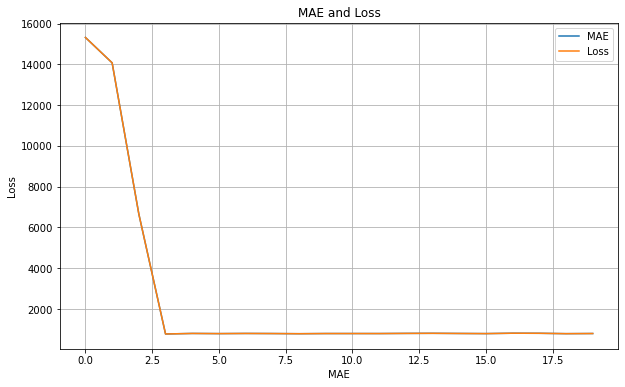

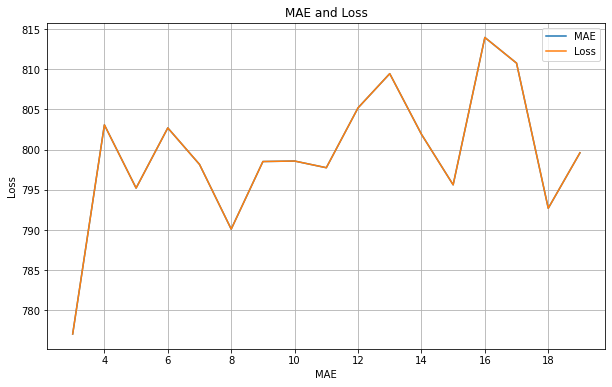

In [15]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

21/21 [==============================] - 1s 15ms/step


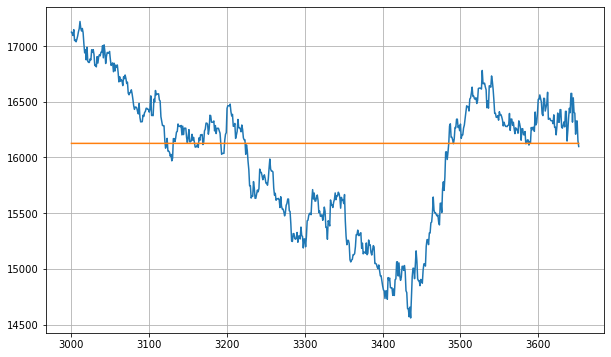

In [16]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [17]:
evaluates = evaluate_preds(y_true=x_valid,
                               y_pred=results)
evaluates

{'mae': 499.36017,
 'mse': 387325.25,
 'rmse': 622.3546,
 'mape': 3.1755216,
 'mase': 9.649162}

In [18]:
into_future = 30
future_forecast = make_future_forecast(values=series,
                                       model=model,
                                       into_future=into_future,
                                       window_size=window_size)

1/1 [==============================] - 0s 32ms/step


In [19]:
next_time_steps = np.arange(time[-1] + 1, time[-1] + 1 + into_future)
next_time_steps

# Insert last timestep/final price into next time steps and future forecasts so the plot connects
next_time_steps = np.insert(next_time_steps, 0, time[-1])
future_forecast = np.insert(future_forecast, 0, series[-1])


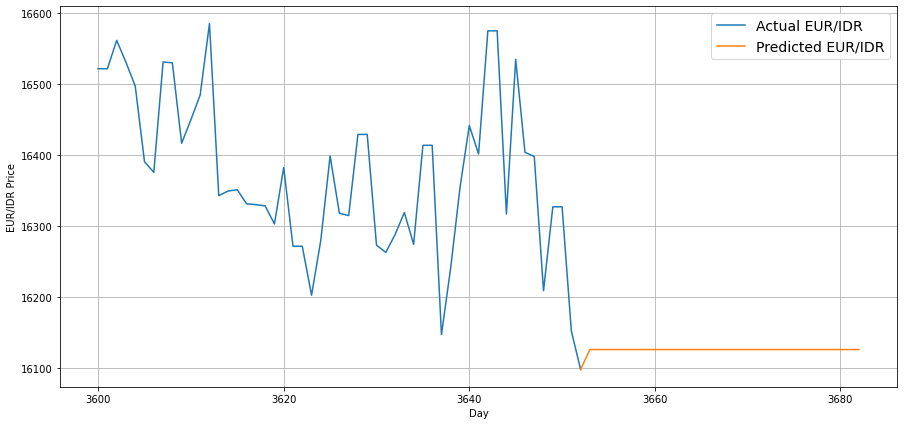

In [21]:

plt.figure(figsize=(15,7))
plot_time_series(time, series, start=3600, format="-", label="Actual EUR/IDR")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted EUR/IDR")